# Global stuff

In [1]:
import os
import glob
import re
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np
import datetime

# Functions

In [2]:

def read_single_file_with_keyword(folder_path, filename_search):
    file_path = os.path.join(folder_path, f"{filename_search}")

    try:
        with open(file_path, 'r') as file:
            # Read and parse the data from the file
            # Assume the data format includes 'q_nm^-1' and 'I'
            data = {
                "q_nm^-1": [],  # List of q values
                "I": [],  # List of corresponding I values
                "sigma": [],  # List of corresponding sigma values
            }

            for line in file:
                if line.startswith("#"):  # Skip comments if any
                    continue

                parts = line.strip().split()  # Assuming data is whitespace-separated
                if len(parts) >= 2:
                    q_value = float(parts[0])
                    I_value = float(parts[1])
                    sigma = float(parts[2])
                    data["q_nm^-1"].append(q_value)
                    data["I"].append(I_value)
                    data["sigma"].append(sigma)

            return data

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"Error reading file {file_path}: {str(e)}")
        return None




import os
import glob
import pandas as pd


def extract_data_from_folder(folder_path, filename_search):
    # Use glob to find all Excel files in the folder
    excel_files = glob.glob(os.path.join(folder_path, "*.xlsx"))

    # Initialize an empty list to store the DataFrames
    dfs = []

    # Loop through each Excel file and read it into a DataFrame
    for excel_file in excel_files:
        df = pd.read_excel(excel_file)
        dfs.append(df)

    # Concatenate the list of DataFrames into one DataFrame
    all_data = pd.concat(dfs, ignore_index=True)

    # Filter the DataFrame based on the Filename column and the keyword
    filtered_df = all_data[all_data['Filename'].str.contains(filename_search)]

    # Initialize variables to store the extracted values
    duration_hours = None
    ctemp_avg_C = None
    i0_avg = None
    bstop_avg = None

    # Check if there are matching rows
    if not filtered_df.empty:
        # Extract the values from the first matching row (assuming there's only one)
        row = filtered_df.iloc[0]
        duration_hours = row['duration_realtime_hr']
        ctemp_avg_C = row['ctemp']
        i0_avg = row['i0']
        bstop_avg = row['bstop']

    # Return the extracted values as a tuple
    return duration_hours, ctemp_avg_C, i0_avg, bstop_avg

######################### 
import os
import re

def search_dat_files_with_keywords(folder_path, keyword, bkg_keyword):
    # Create a regular expression pattern to match the keyword and bkg_keyword in the filename
    pattern = re.compile(f".*{re.escape(bkg_keyword)}.*{re.escape(keyword)}.*", re.IGNORECASE)

    matching_dat_files = []

    # List files in the folder (not including subfolders)
    for file in os.listdir(folder_path):
        if pattern.match(file) and file.endswith('.dat'):
            matching_dat_files.append(file)

    # Sort the matching files by modification time
    matching_dat_files.sort(key=lambda file: os.path.getmtime(os.path.join(folder_path, file)))

    return matching_dat_files

################################################################################################


def process_sample_data(filename_search, folder_path, inst_parameters):
    Sample_data = read_single_file_with_keyword(folder_path, filename_search)
    q = Sample_data["q_nm^-1"]
    I_raw = Sample_data["I"]
    I_sigma = Sample_data["sigma"]
    I_norm = Sample_data["I"] / inst_parameters[3]
    I_norm_sigma = I_sigma / inst_parameters[3]           # sigma of normalised intensity
    return q, I_raw, I_sigma, I_norm, I_norm_sigma

# WAXS

Run4_MeOH_T20_dx1_ctr0_3average_all_WAXS.dat


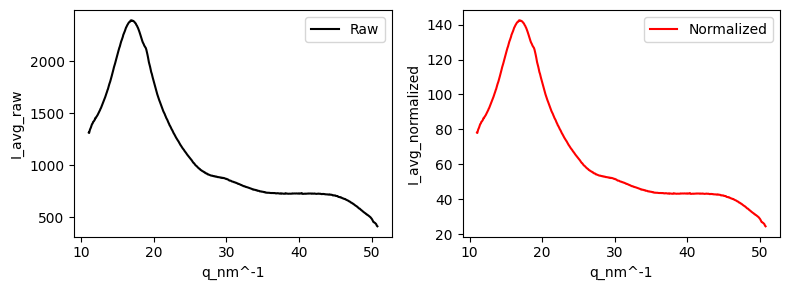

Run4_MeOH_cool_T190_dx0_ctr0_1average_all_WAXS.dat


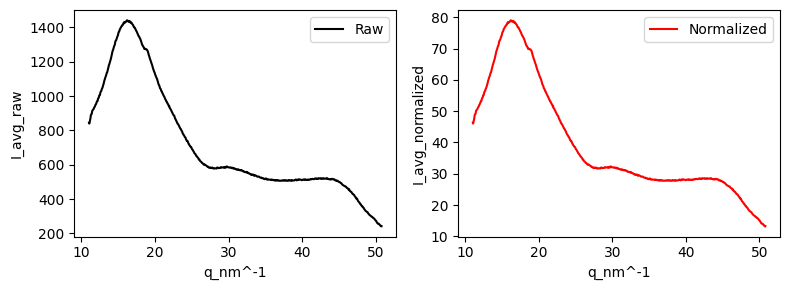

Run4_PLA_MeOH_T20_dx1_ctr0_3average_all_WAXS.dat


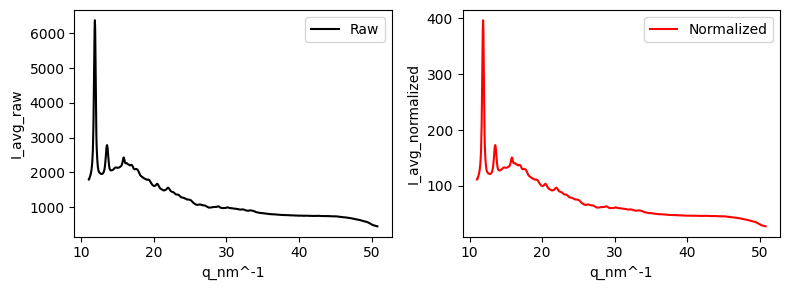

Run4_PLA_MeOH_cool_T190_dx0_ctr0_1average_all_WAXS.dat


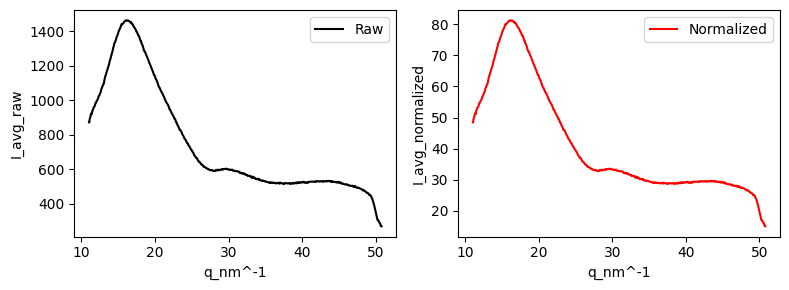

Run4_PLA_T20_dx1_ctr0_3average_all_WAXS.dat


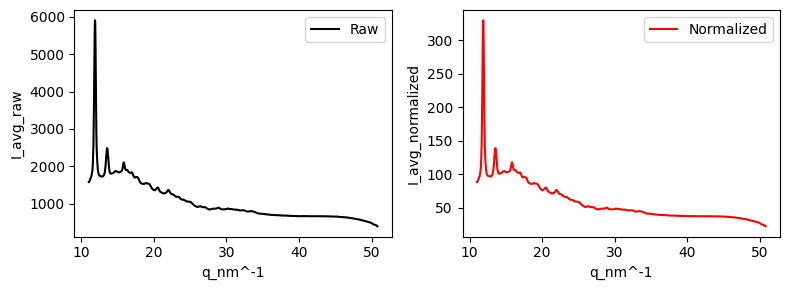

Run4_PLA_cool_T190_dx0_ctr0_1average_all_WAXS.dat


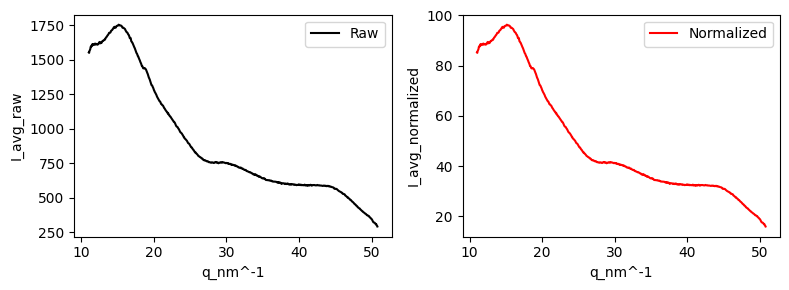

Run4_MeOH_T30_dx1_ctr1_3average_all_WAXS.dat


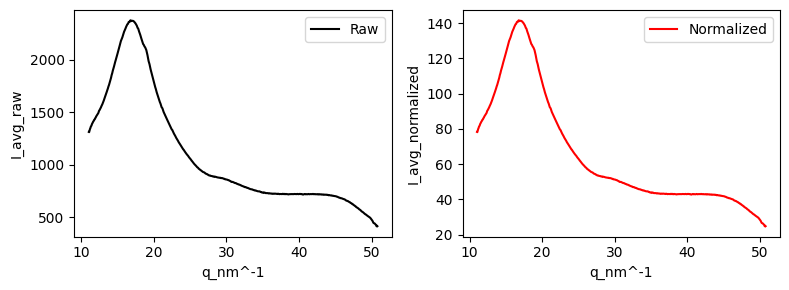

Run4_MeOH_cool_T180_dx0_ctr1_1average_all_WAXS.dat


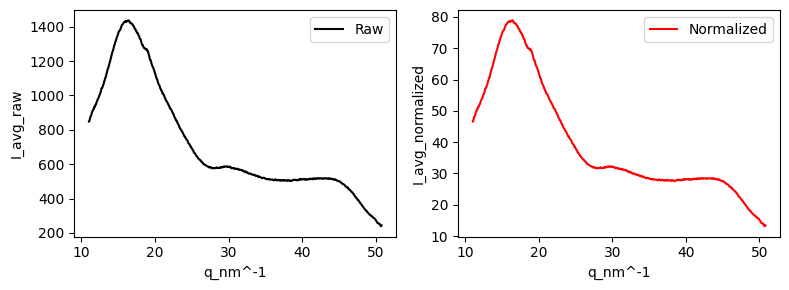

Run4_PLA_MeOH_T30_dx1_ctr1_3average_all_WAXS.dat


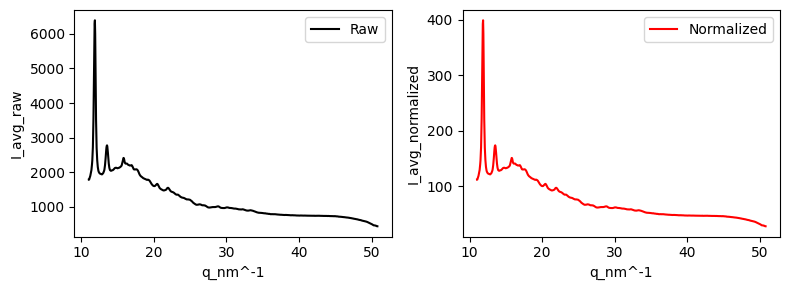

Run4_PLA_MeOH_cool_T180_dx0_ctr1_1average_all_WAXS.dat


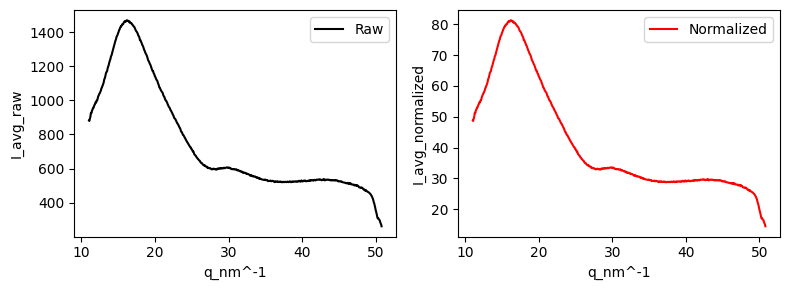

Run4_PLA_T30_dx1_ctr1_3average_all_WAXS.dat


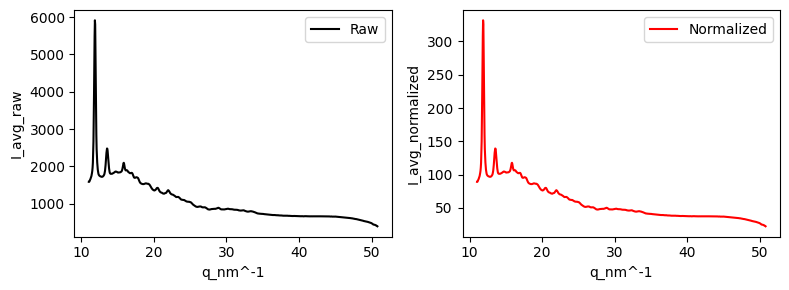

Run4_PLA_cool_T180_dx0_ctr1_1average_all_WAXS.dat


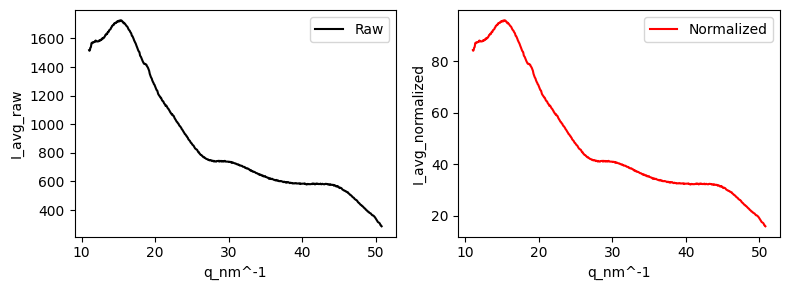

Run4_MeOH_T40_dx1_ctr2_3average_all_WAXS.dat


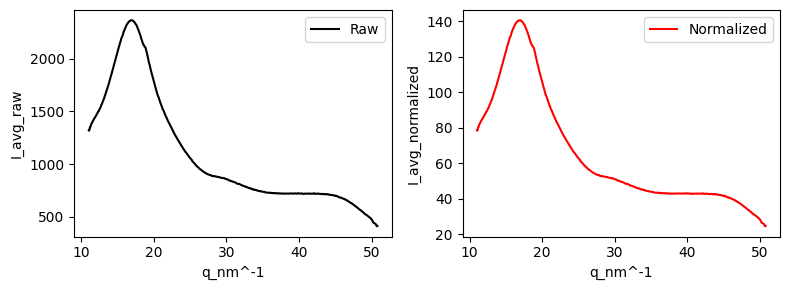

Run4_MeOH_cool_T170_dx0_ctr2_1average_all_WAXS.dat


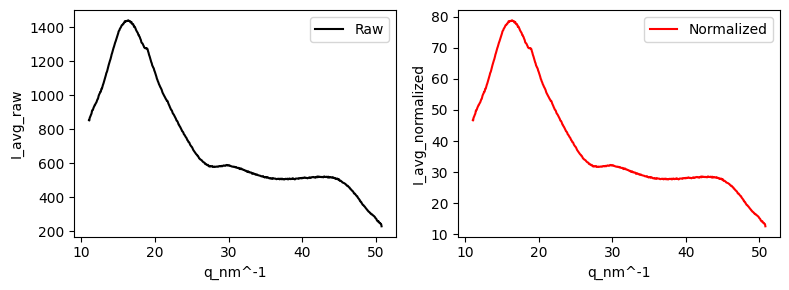

Run4_PLA_MeOH_T40_dx1_ctr2_3average_all_WAXS.dat


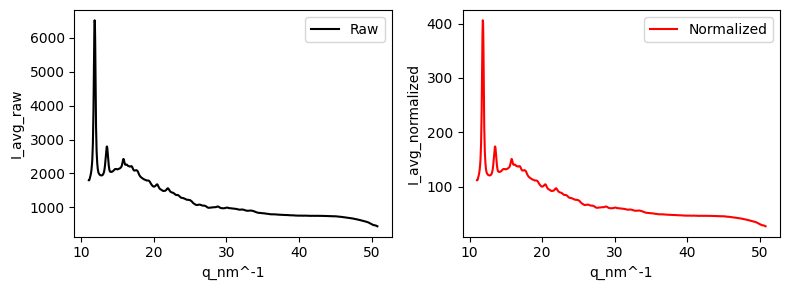

Run4_PLA_MeOH_cool_T170_dx0_ctr2_1average_all_WAXS.dat


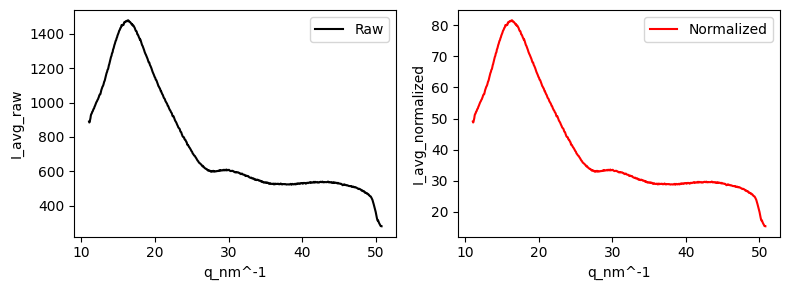

Run4_PLA_T40_dx1_ctr2_3average_all_WAXS.dat


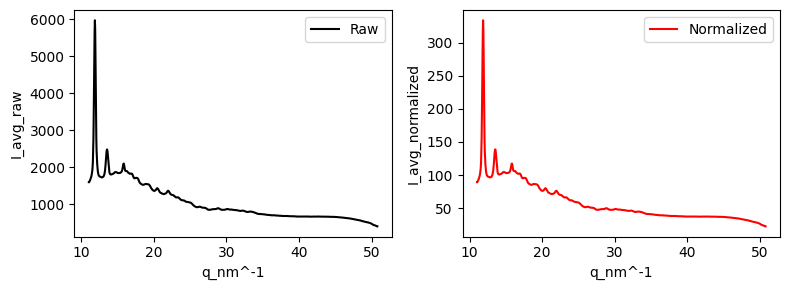

Run4_PLA_cool_T170_dx0_ctr2_1average_all_WAXS.dat


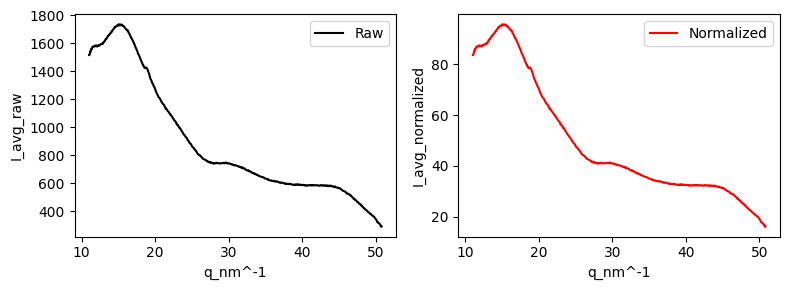

Run4_MeOH_T50_dx1_ctr3_3average_all_WAXS.dat


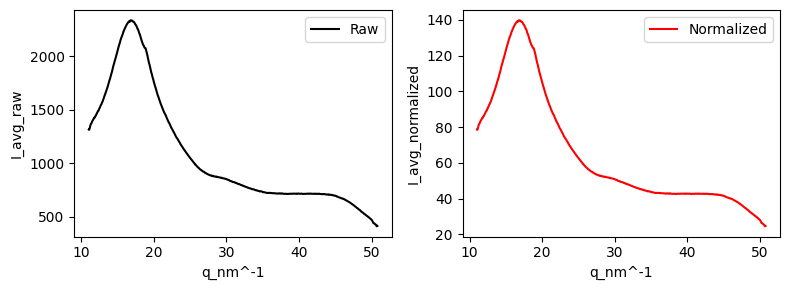

Run4_MeOH_cool_T160_dx0_ctr3_1average_all_WAXS.dat


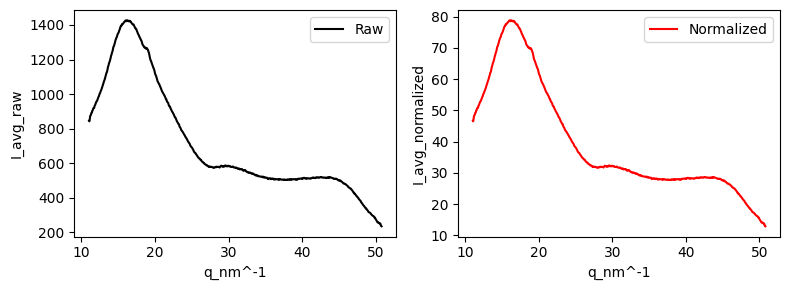

Run4_PLA_MeOH_T50_dx1_ctr3_3average_all_WAXS.dat


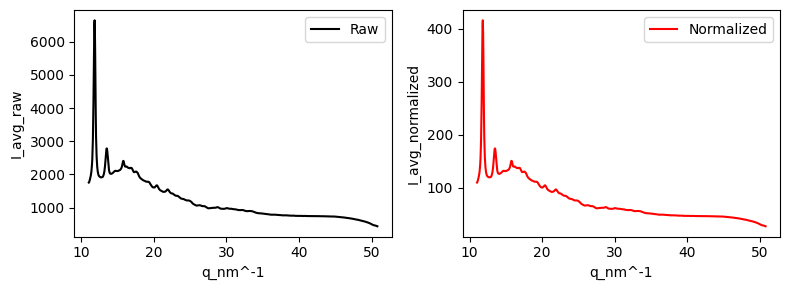

Run4_PLA_MeOH_cool_T160_dx0_ctr3_1average_all_WAXS.dat


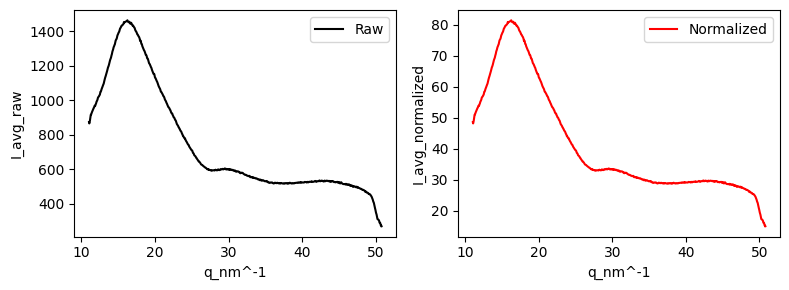

Run4_PLA_T50_dx1_ctr3_3average_all_WAXS.dat


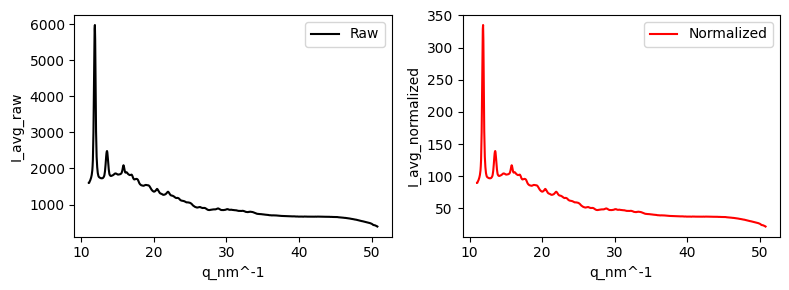

Run4_PLA_cool_T160_dx0_ctr3_1average_all_WAXS.dat


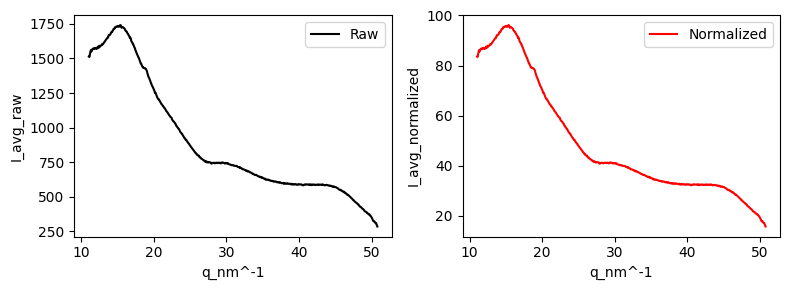

Run4_MeOH_T60_dx1_ctr4_3average_all_WAXS.dat


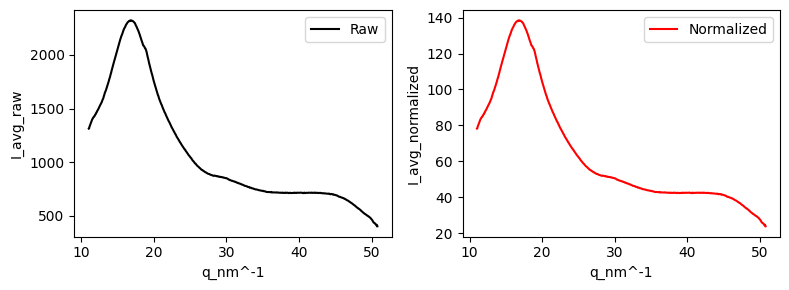

Run4_MeOH_cool_T150_dx0_ctr4_1average_all_WAXS.dat


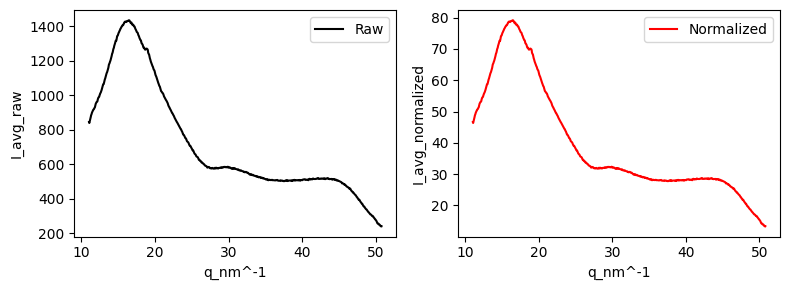

Run4_PLA_MeOH_T60_dx1_ctr4_3average_all_WAXS.dat


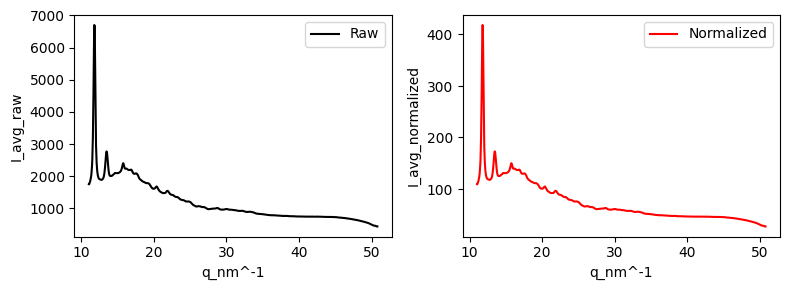

Run4_PLA_MeOH_cool_T150_dx0_ctr4_1average_all_WAXS.dat


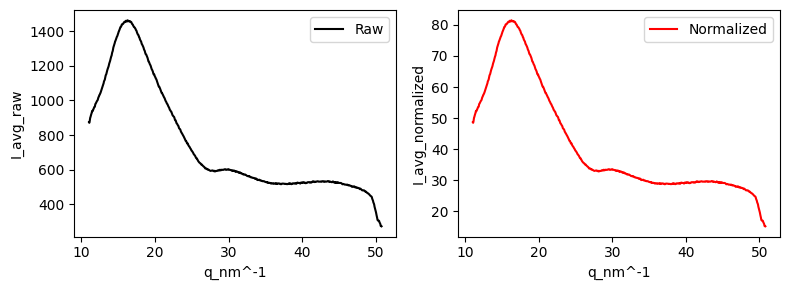

Run4_PLA_T60_dx1_ctr4_3average_all_WAXS.dat


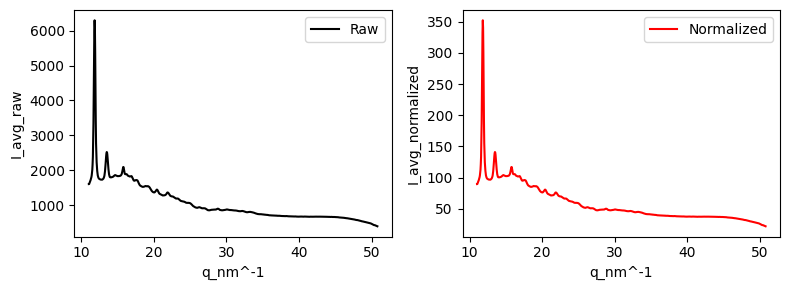

Run4_PLA_cool_T150_dx0_ctr4_1average_all_WAXS.dat


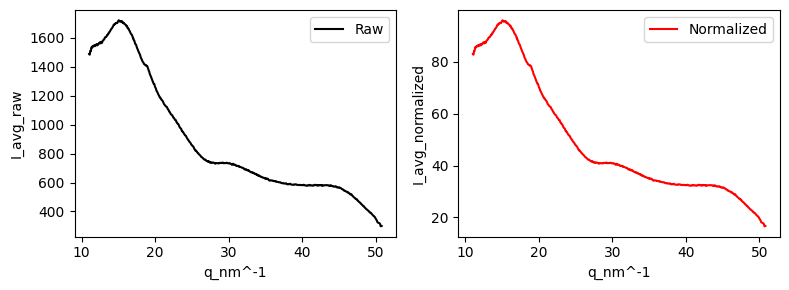

Run4_MeOH_T70_dx1_ctr5_3average_all_WAXS.dat


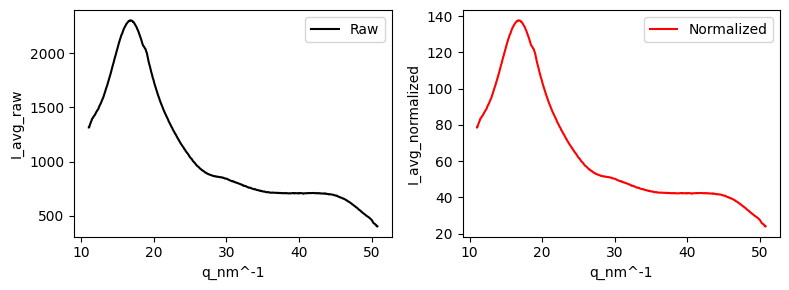

Run4_MeOH_cool_T140_dx0_ctr5_1average_all_WAXS.dat


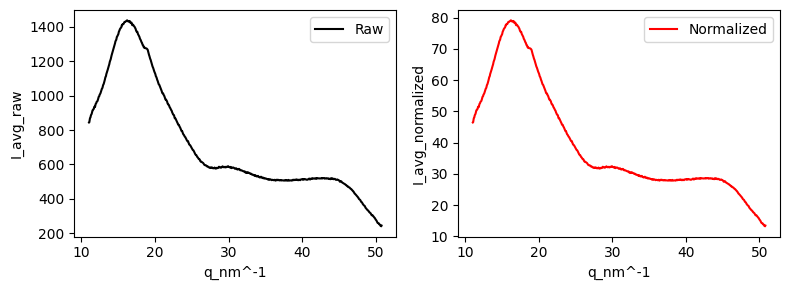

Run4_PLA_MeOH_T70_dx1_ctr5_3average_all_WAXS.dat


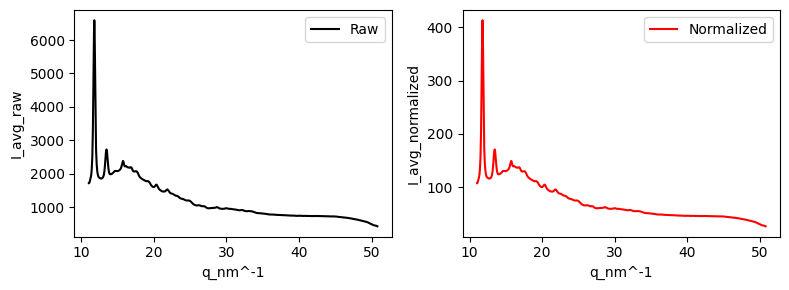

Run4_PLA_MeOH_cool_T140_dx0_ctr5_1average_all_WAXS.dat


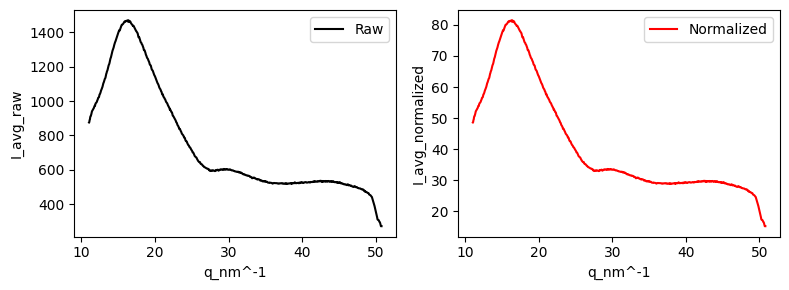

Run4_PLA_T70_dx1_ctr5_3average_all_WAXS.dat


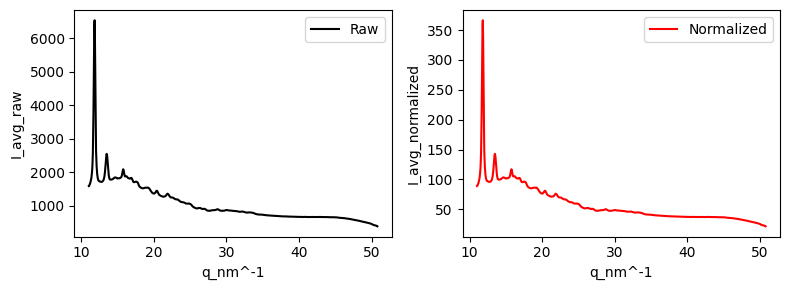

Run4_PLA_cool_T140_dx0_ctr5_1average_all_WAXS.dat


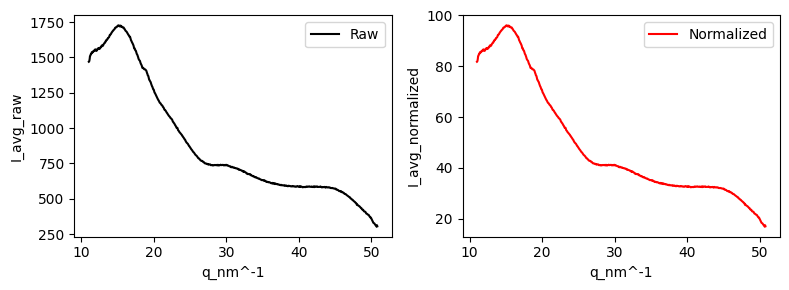

Run4_MeOH_T80_dx1_ctr6_3average_all_WAXS.dat


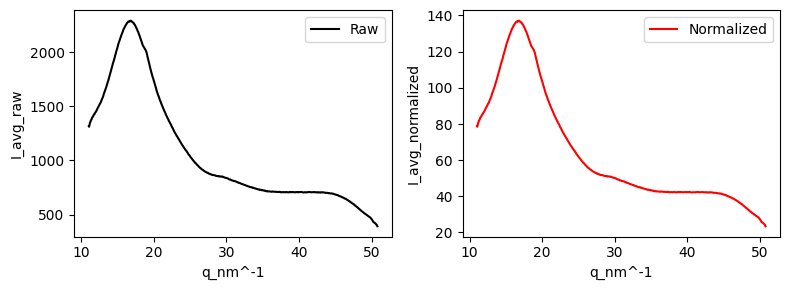

Run4_MeOH_cool_T130_dx0_ctr6_1average_all_WAXS.dat


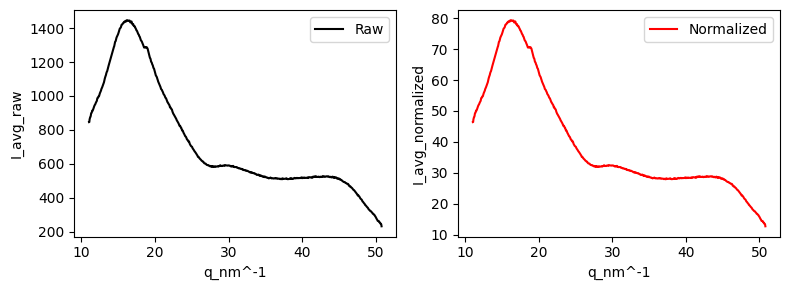

Run4_PLA_MeOH_T80_dx1_ctr6_3average_all_WAXS.dat


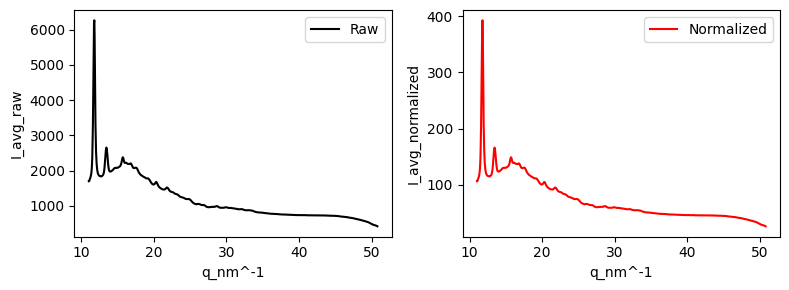

Run4_PLA_MeOH_cool_T130_dx0_ctr6_1average_all_WAXS.dat


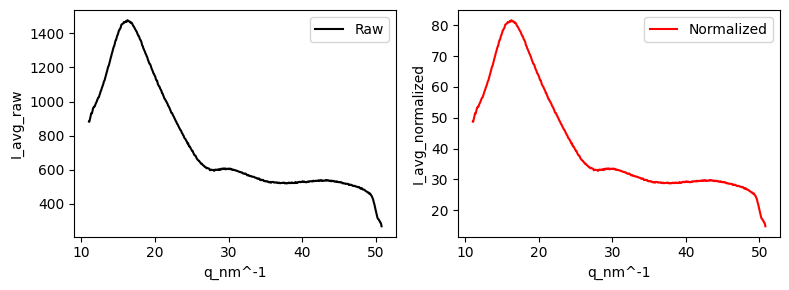

Run4_PLA_T80_dx1_ctr6_3average_all_WAXS.dat


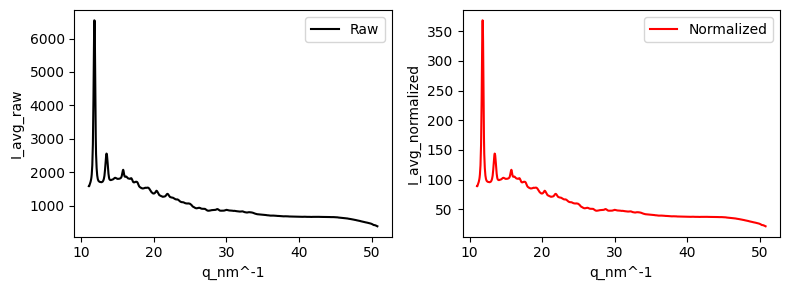

Run4_PLA_cool_T130_dx0_ctr6_1average_all_WAXS.dat


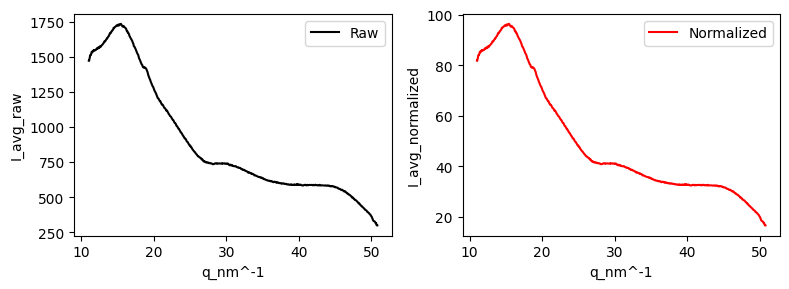

Run4_MeOH_T90_dx1_ctr7_3average_all_WAXS.dat


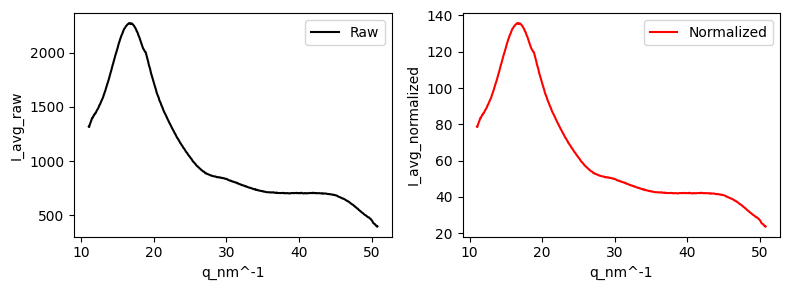

Run4_MeOH_cool_T120_dx0_ctr7_1average_all_WAXS.dat


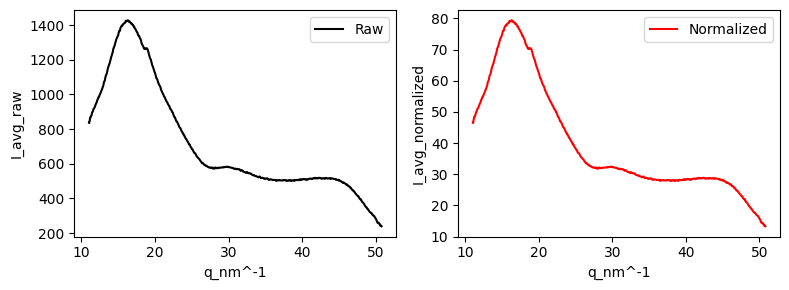

Run4_PLA_MeOH_T90_dx1_ctr7_3average_all_WAXS.dat


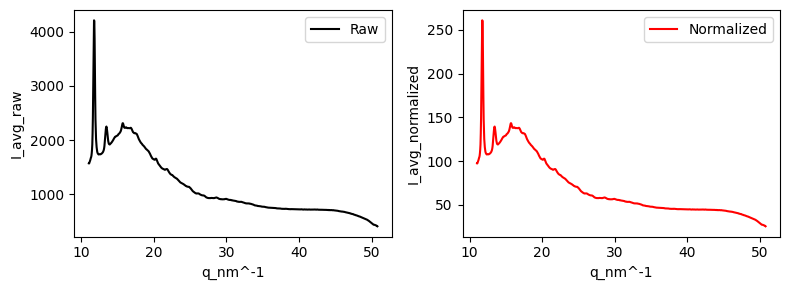

Run4_PLA_MeOH_cool_T120_dx0_ctr7_1average_all_WAXS.dat


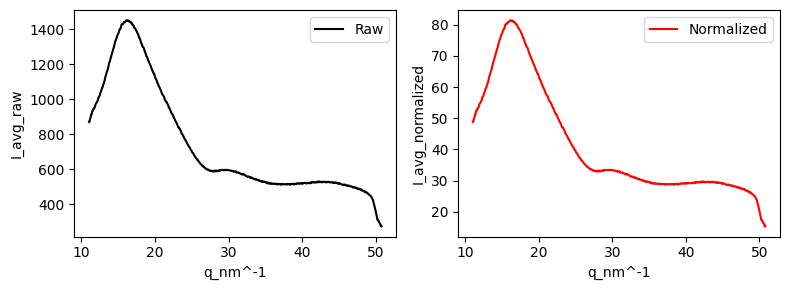

Run4_PLA_T90_dx1_ctr7_3average_all_WAXS.dat


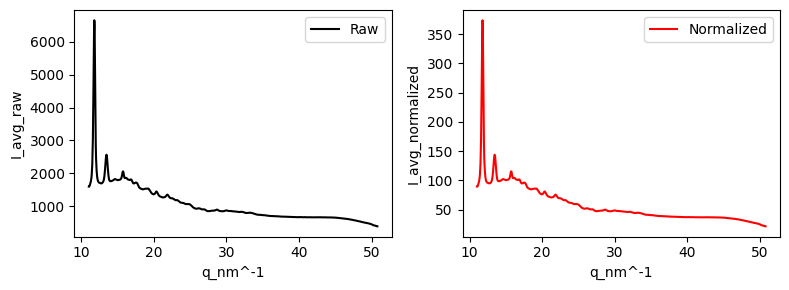

Run4_PLA_cool_T120_dx0_ctr7_1average_all_WAXS.dat


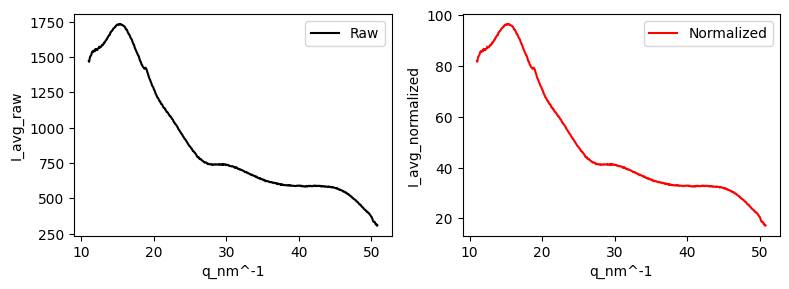

Run4_MeOH_T100_dx1_ctr8_3average_all_WAXS.dat


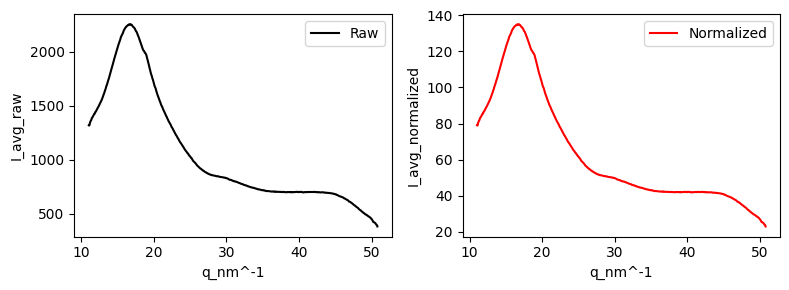

Run4_MeOH_cool_T110_dx0_ctr8_1average_all_WAXS.dat


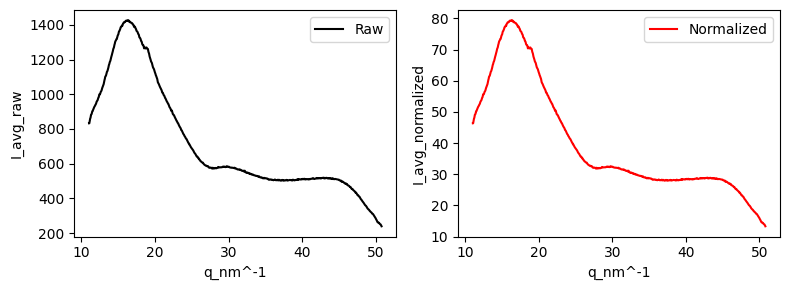

Run4_PLA_MeOH_T100_dx1_ctr8_3average_all_WAXS.dat


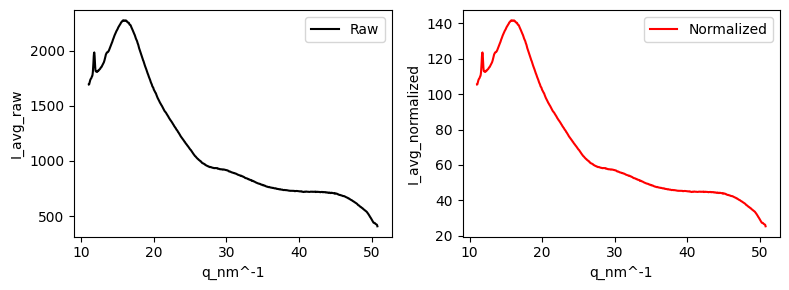

Run4_PLA_MeOH_cool_T110_dx0_ctr8_1average_all_WAXS.dat


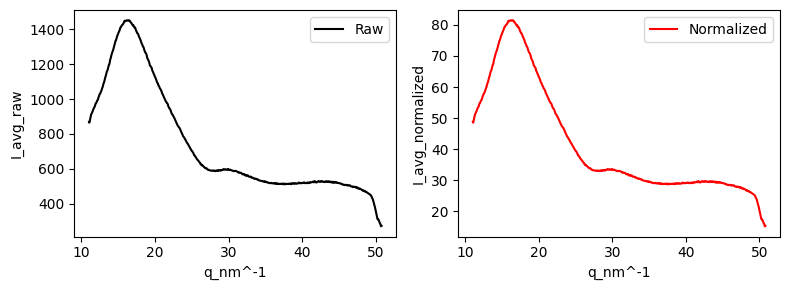

Run4_PLA_T100_dx1_ctr8_3average_all_WAXS.dat


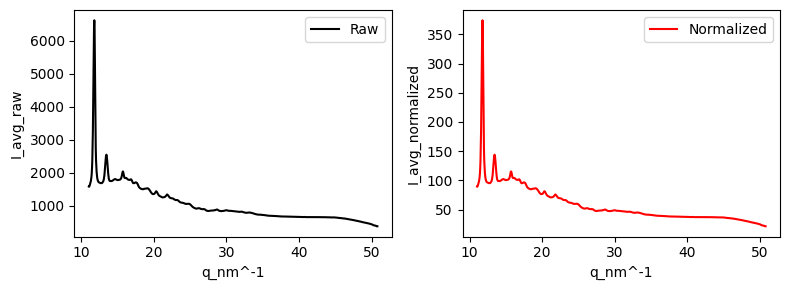

Run4_PLA_cool_T110_dx0_ctr8_1average_all_WAXS.dat


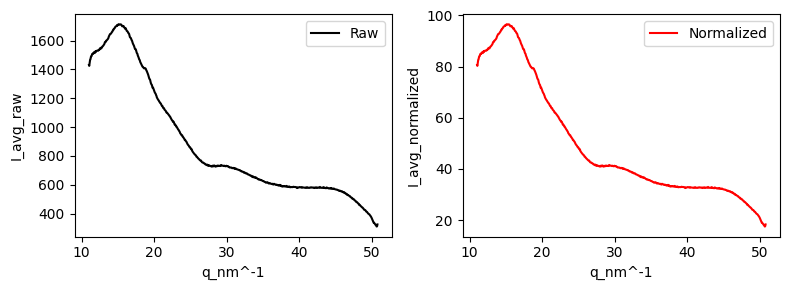

Run4_MeOH_T110_dx1_ctr9_3average_all_WAXS.dat


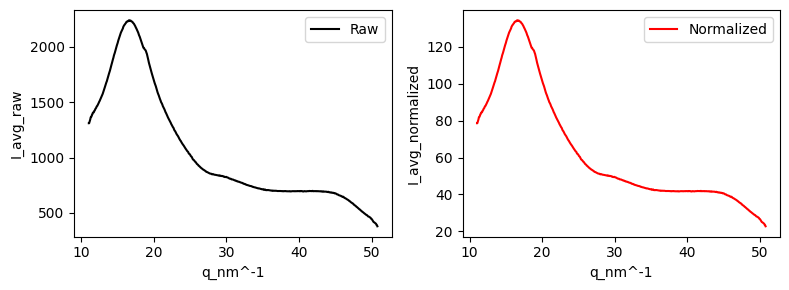

Run4_MeOH_cool_T100_dx0_ctr9_1average_all_WAXS.dat


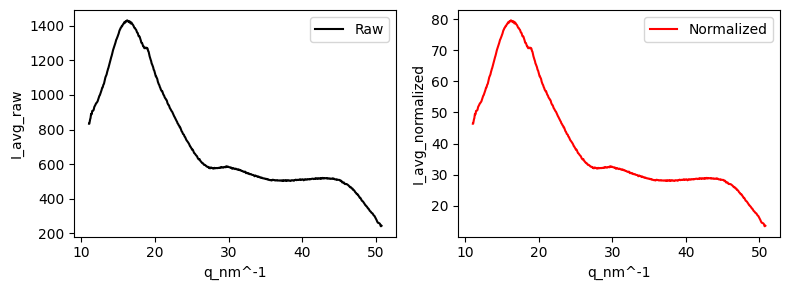

Run4_PLA_MeOH_T110_dx1_ctr9_3average_all_WAXS.dat


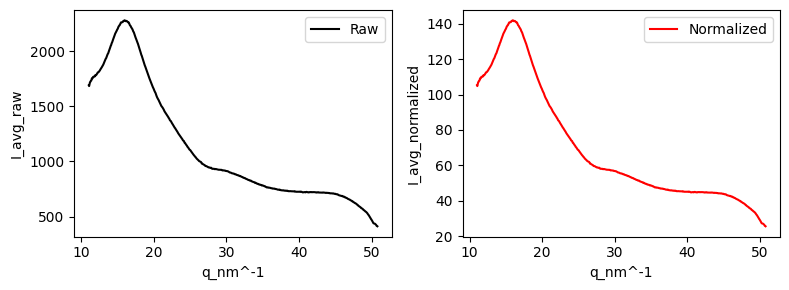

Run4_PLA_MeOH_cool_T100_dx0_ctr9_1average_all_WAXS.dat


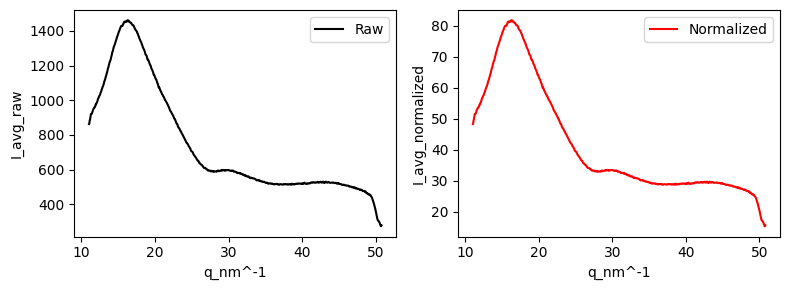

Run4_PLA_T110_dx1_ctr9_3average_all_WAXS.dat


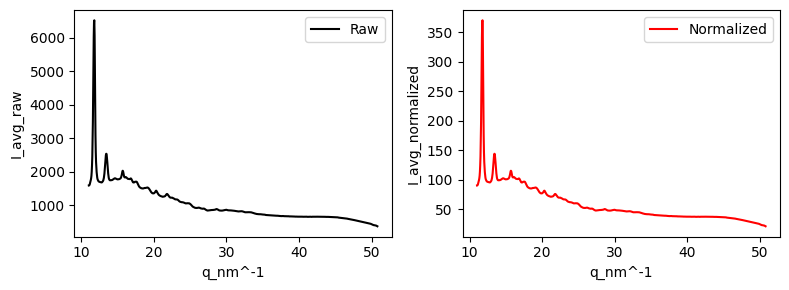

Run4_PLA_cool_T100_dx0_ctr9_1average_all_WAXS.dat


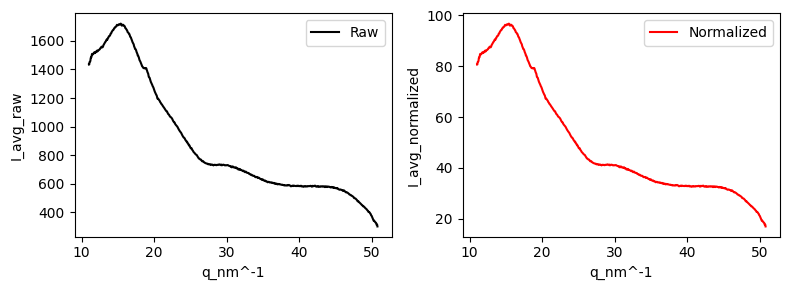

Run4_MeOH_T120_dx1_ctr10_3average_all_WAXS.dat


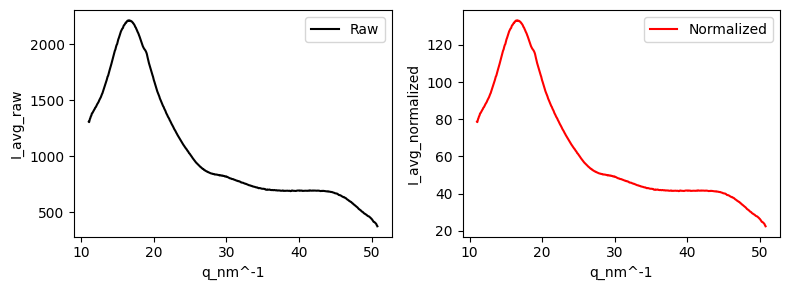

Run4_MeOH_cool_T90_dx0_ctr10_1average_all_WAXS.dat


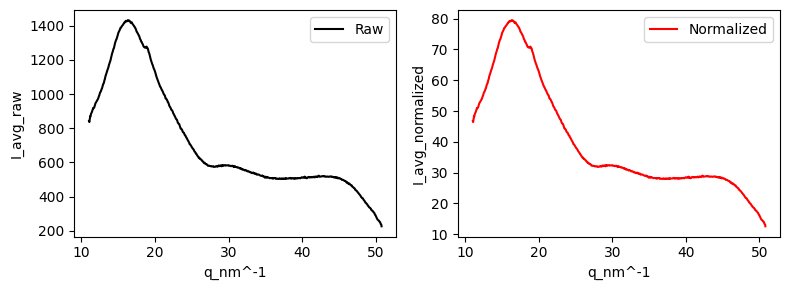

Run4_PLA_MeOH_T120_dx1_ctr10_3average_all_WAXS.dat


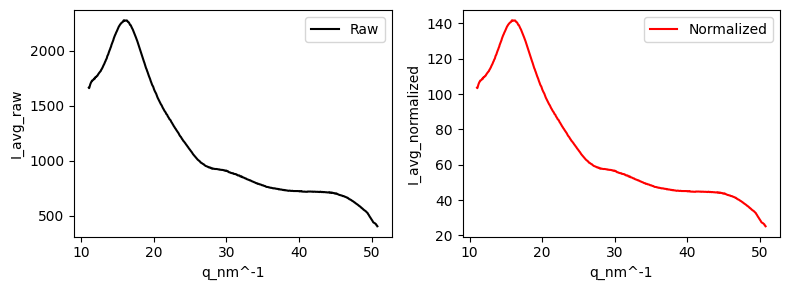

Run4_PLA_MeOH_cool_T90_dx0_ctr10_1average_all_WAXS.dat


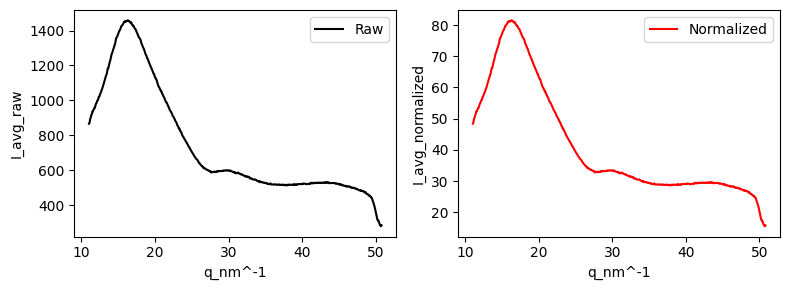

Run4_PLA_T120_dx1_ctr10_3average_all_WAXS.dat


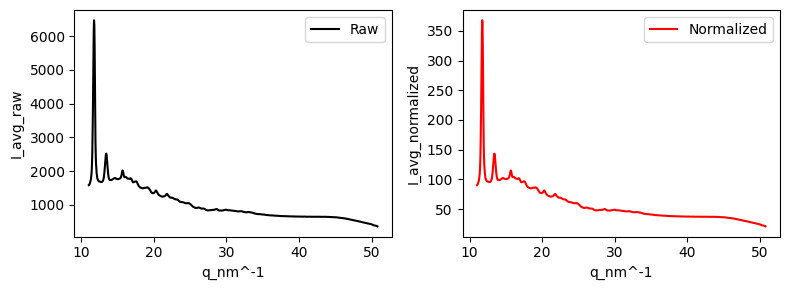

Run4_PLA_cool_T90_dx0_ctr10_1average_all_WAXS.dat


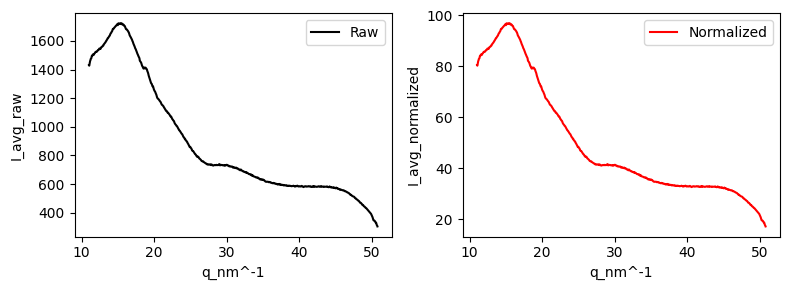

Run4_MeOH_T130_dx1_ctr11_3average_all_WAXS.dat


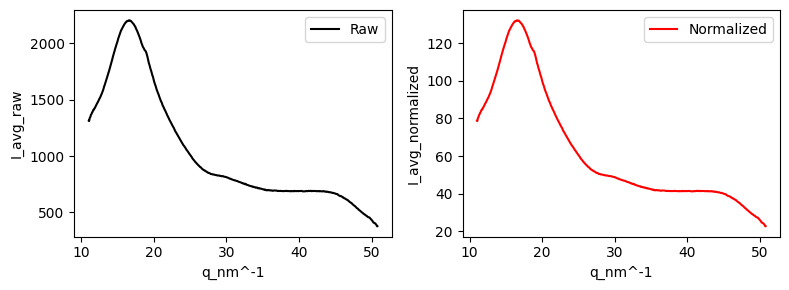

Run4_MeOH_cool_T80_dx0_ctr11_1average_all_WAXS.dat


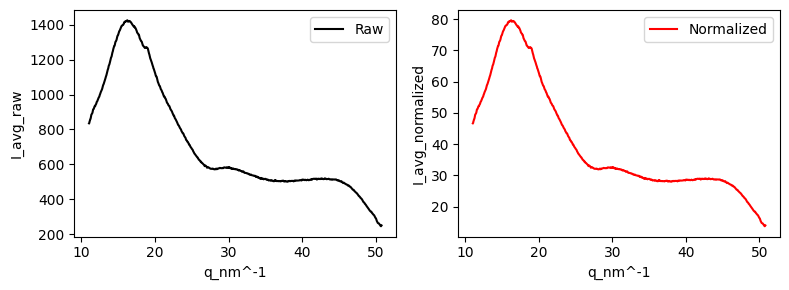

Run4_PLA_MeOH_T130_dx1_ctr11_3average_all_WAXS.dat


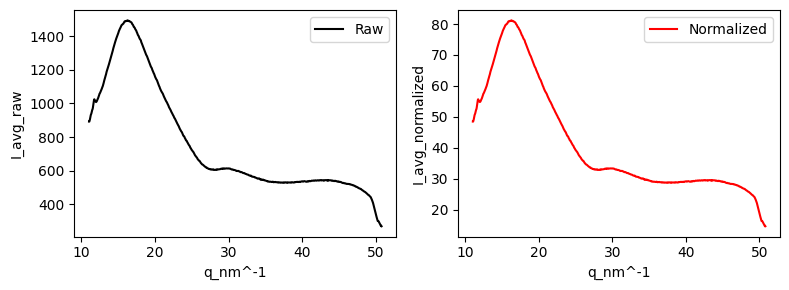

Run4_PLA_MeOH_cool_T80_dx0_ctr11_1average_all_WAXS.dat


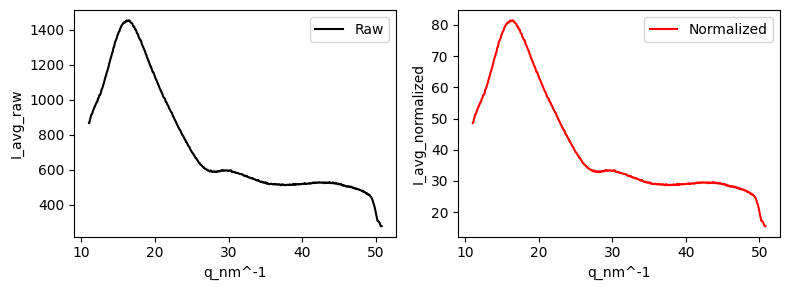

Run4_PLA_T130_dx1_ctr11_3average_all_WAXS.dat


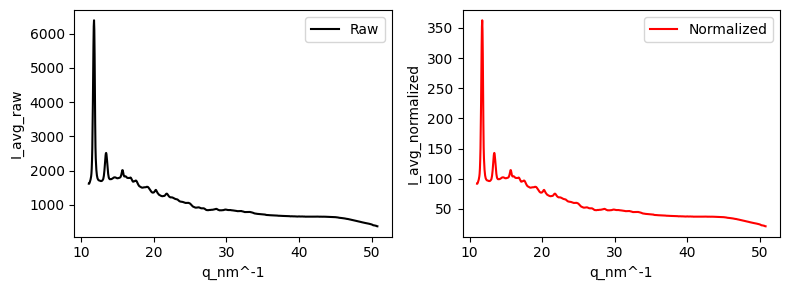

Run4_PLA_cool_T80_dx0_ctr11_1average_all_WAXS.dat


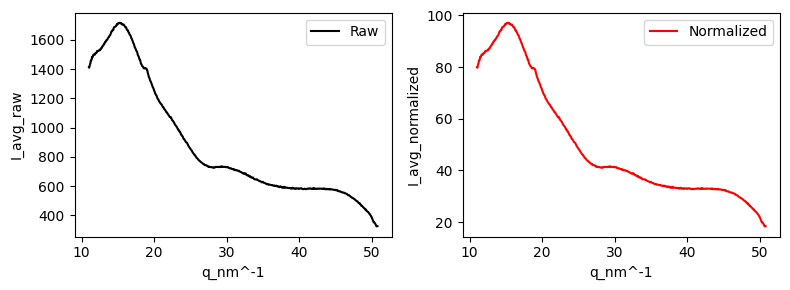

Run4_MeOH_T140_dx1_ctr12_3average_all_WAXS.dat


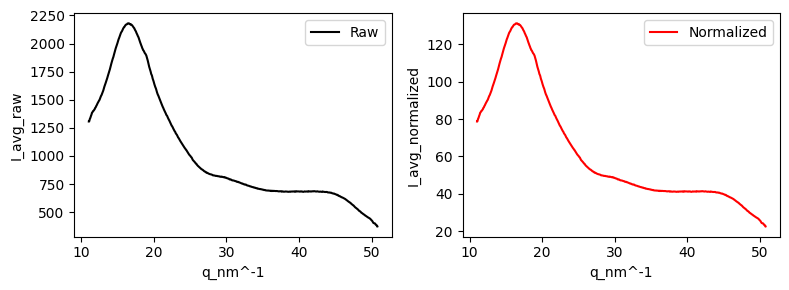

Run4_MeOH_cool_T70_dx0_ctr12_1average_all_WAXS.dat


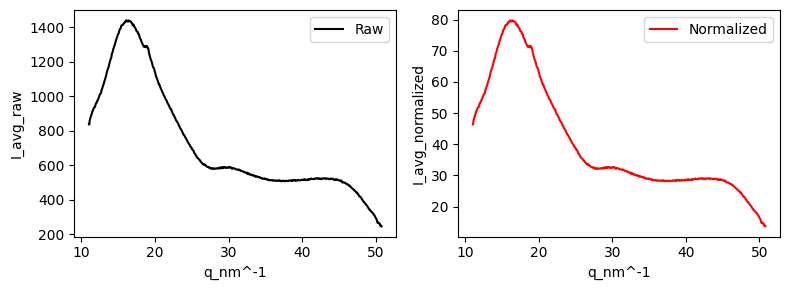

Run4_PLA_MeOH_T140_dx1_ctr12_3average_all_WAXS.dat


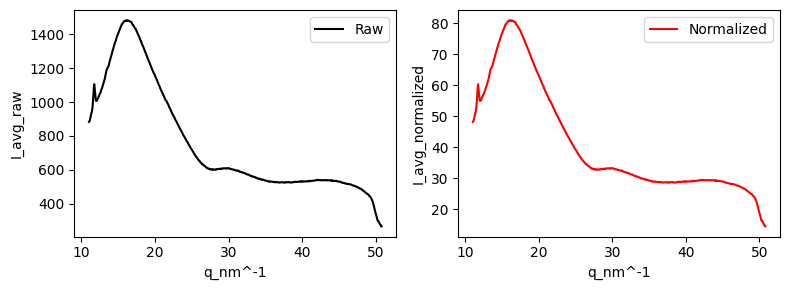

Run4_PLA_MeOH_cool_T70_dx0_ctr12_1average_all_WAXS.dat


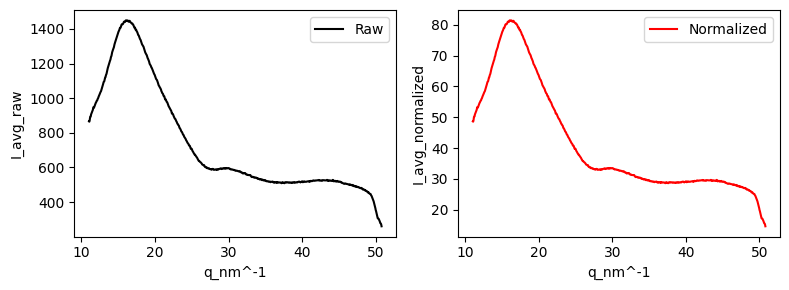

Run4_PLA_T140_dx1_ctr12_3average_all_WAXS.dat


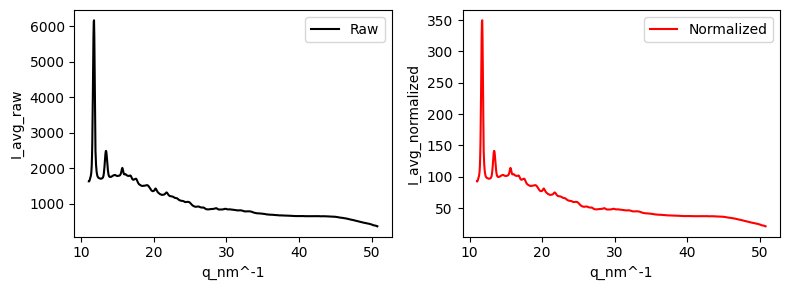

Run4_PLA_cool_T70_dx0_ctr12_1average_all_WAXS.dat


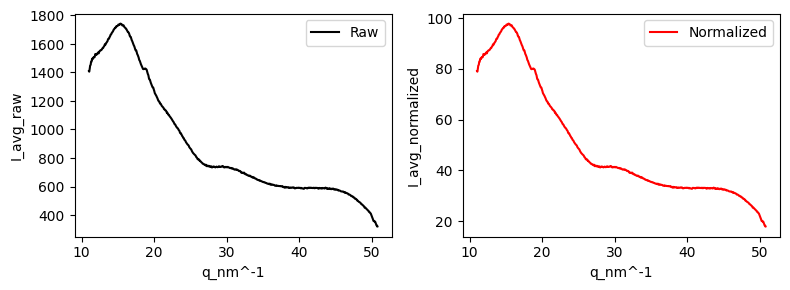

Run4_MeOH_T150_dx1_ctr13_3average_all_WAXS.dat


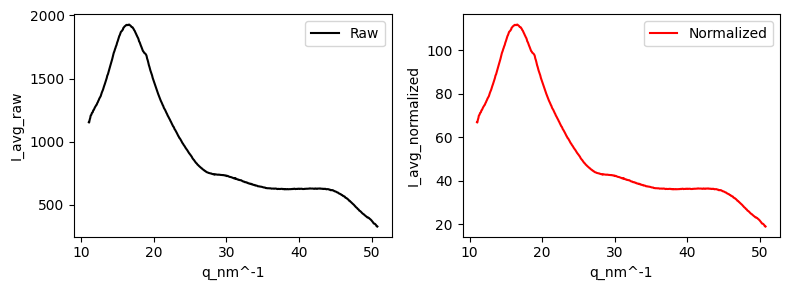

Run4_MeOH_cool_T60_dx0_ctr13_1average_all_WAXS.dat


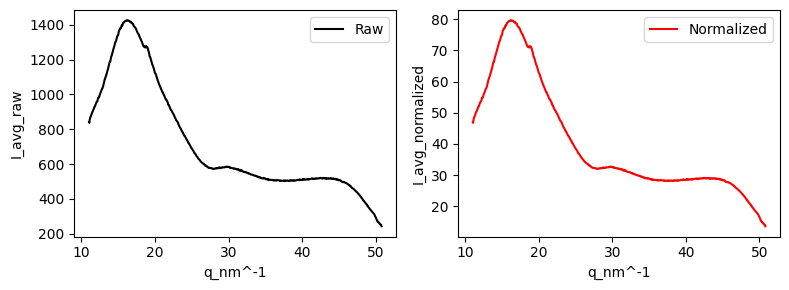

Run4_PLA_MeOH_T150_dx1_ctr13_3average_all_WAXS.dat


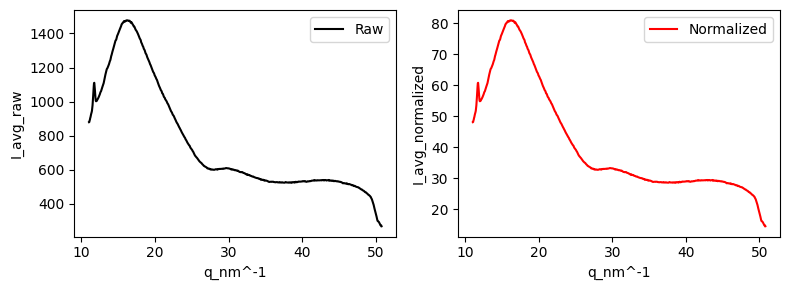

Run4_PLA_MeOH_cool_T60_dx0_ctr13_1average_all_WAXS.dat


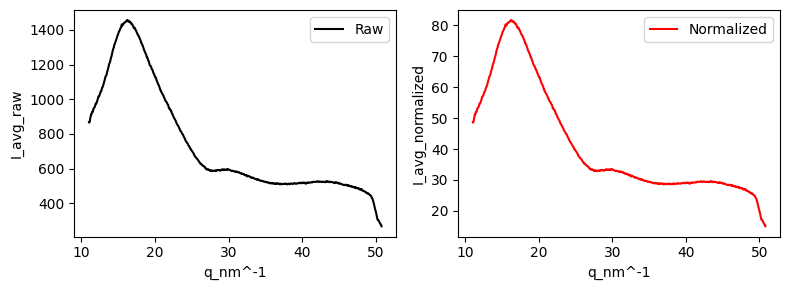

Run4_PLA_T150_dx1_ctr13_3average_all_WAXS.dat


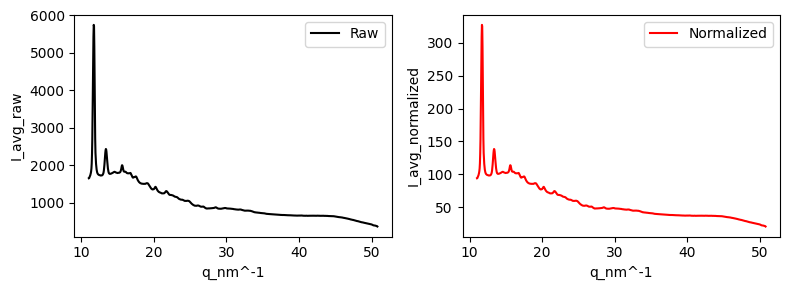

Run4_PLA_cool_T60_dx0_ctr13_1average_all_WAXS.dat


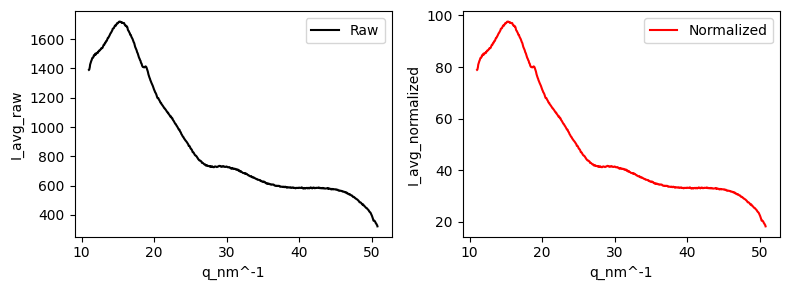

Run4_MeOH_T160_dx1_ctr14_3average_all_WAXS.dat


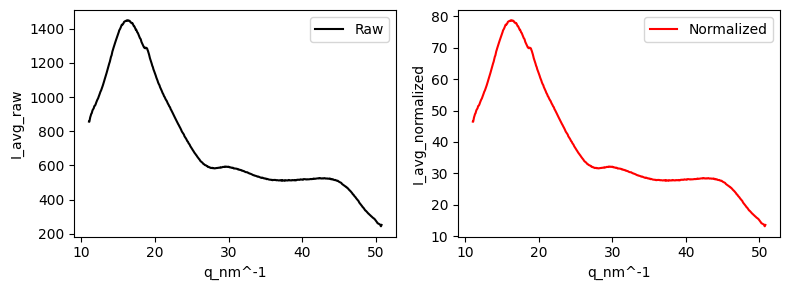

Run4_MeOH_cool_T50_dx0_ctr14_1average_all_WAXS.dat


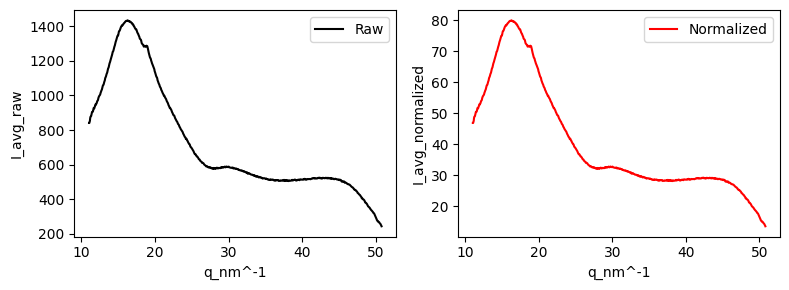

Run4_PLA_MeOH_T160_dx1_ctr14_3average_all_WAXS.dat


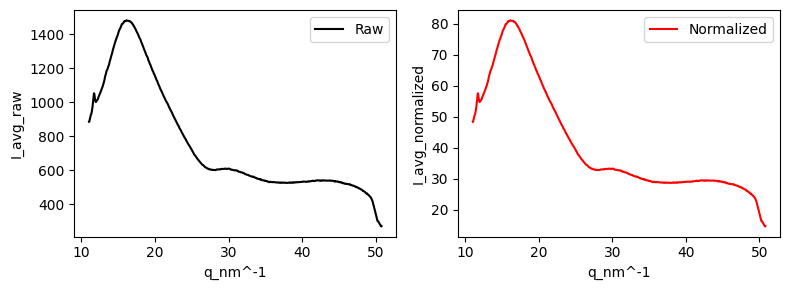

Run4_PLA_MeOH_cool_T50_dx0_ctr14_1average_all_WAXS.dat


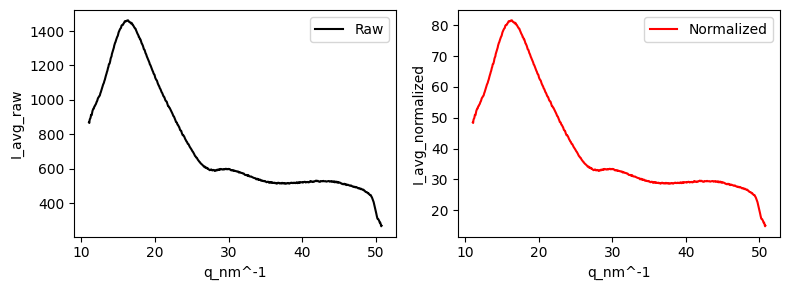

Run4_PLA_T160_dx1_ctr14_3average_all_WAXS.dat


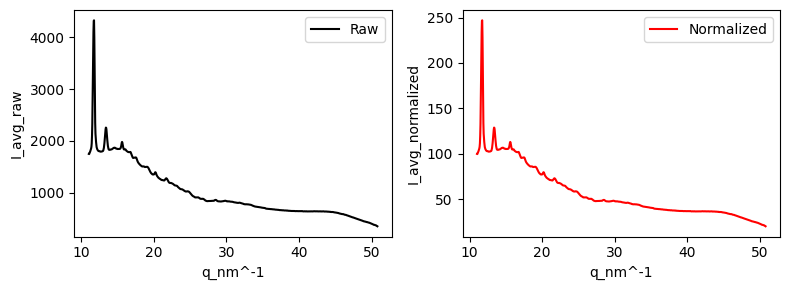

Run4_PLA_cool_T50_dx0_ctr14_1average_all_WAXS.dat


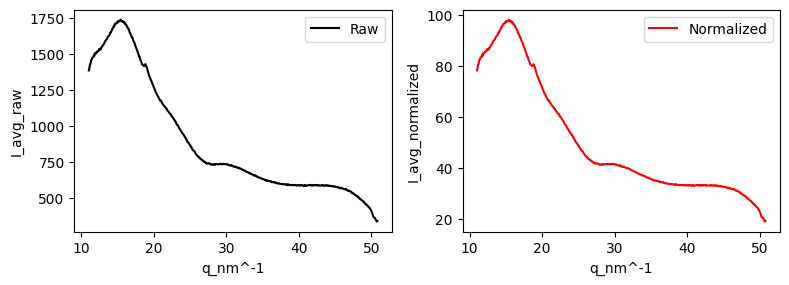

Run4_MeOH_T170_dx1_ctr15_3average_all_WAXS.dat


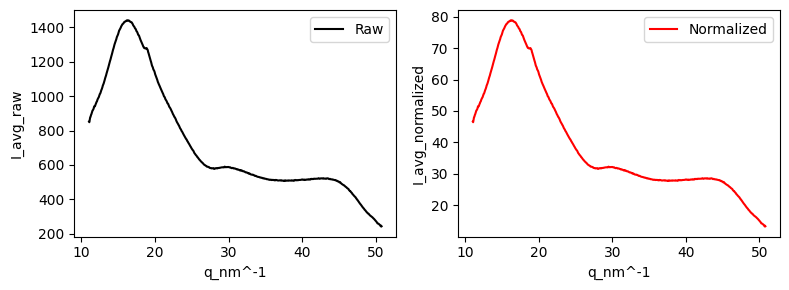

Run4_MeOH_cool_T40_dx0_ctr15_1average_all_WAXS.dat


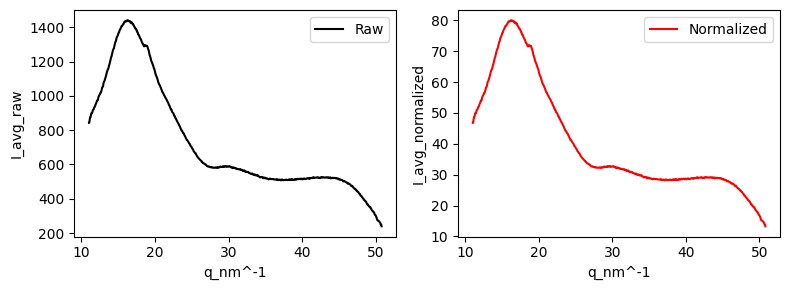

Run4_PLA_MeOH_T170_dx1_ctr15_3average_all_WAXS.dat


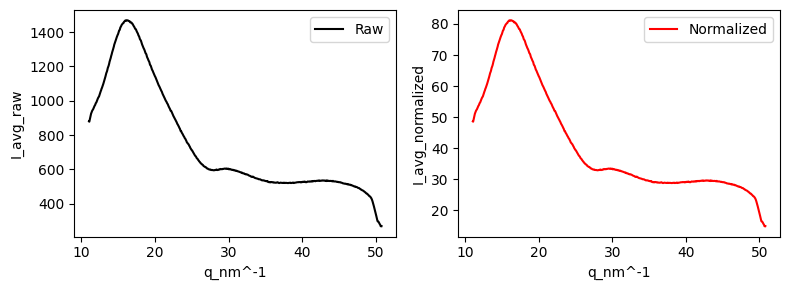

Run4_PLA_MeOH_cool_T40_dx0_ctr15_1average_all_WAXS.dat


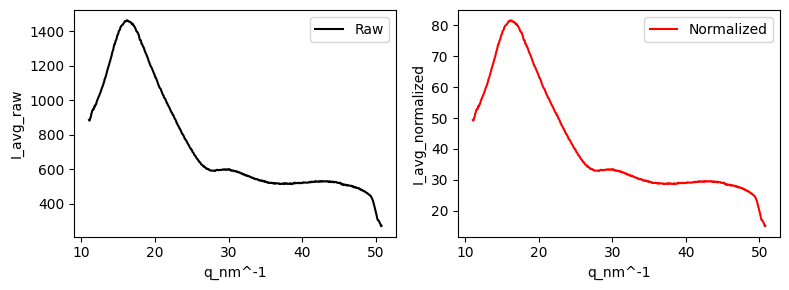

Run4_PLA_T170_dx1_ctr15_3average_all_WAXS.dat


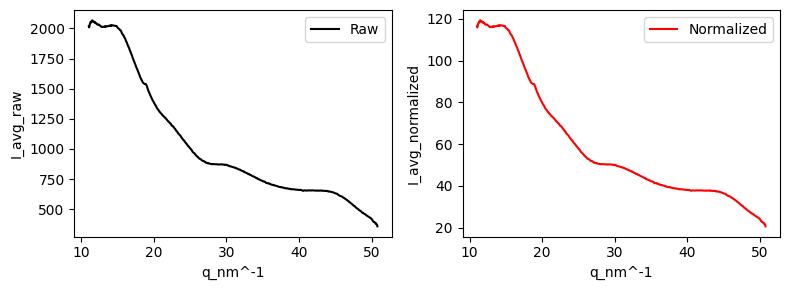

Run4_PLA_cool_T40_dx0_ctr15_1average_all_WAXS.dat


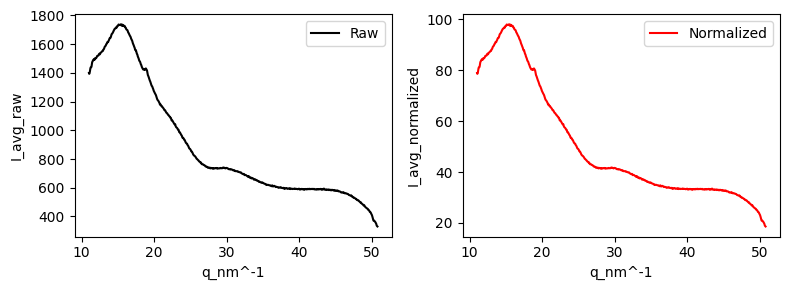

Run4_MeOH_T180_dx1_ctr16_3average_all_WAXS.dat


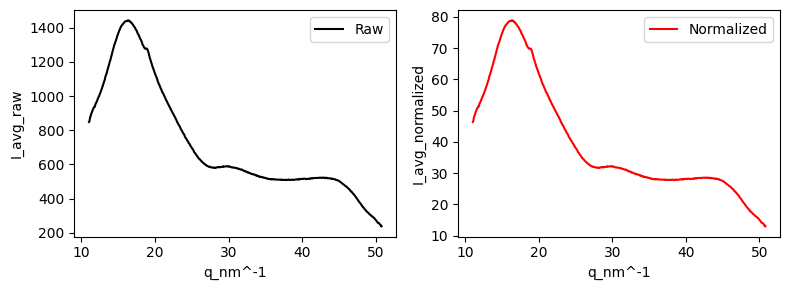

Run4_PLA_MeOH_T180_dx1_ctr16_3average_all_WAXS.dat


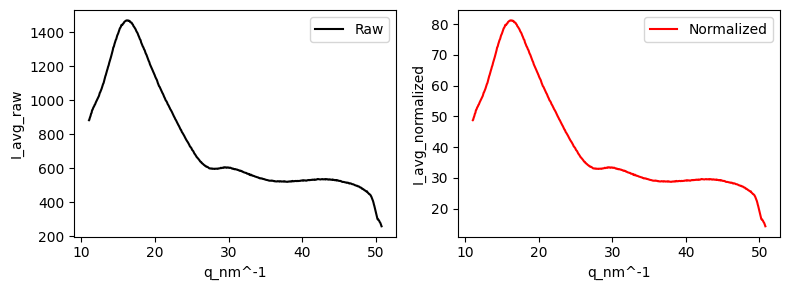

Run4_PLA_T180_dx1_ctr16_3average_all_WAXS.dat


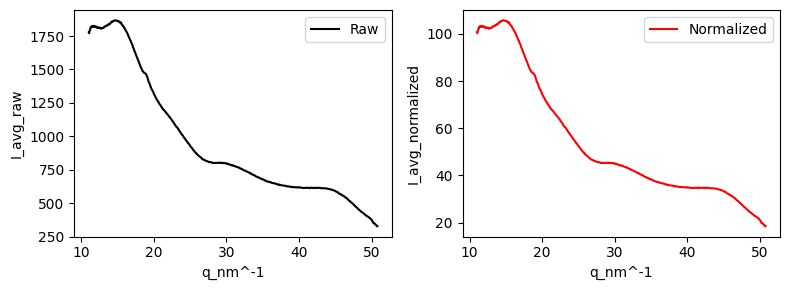

Run4_MeOH_T190_dx1_ctr17_3average_all_WAXS.dat


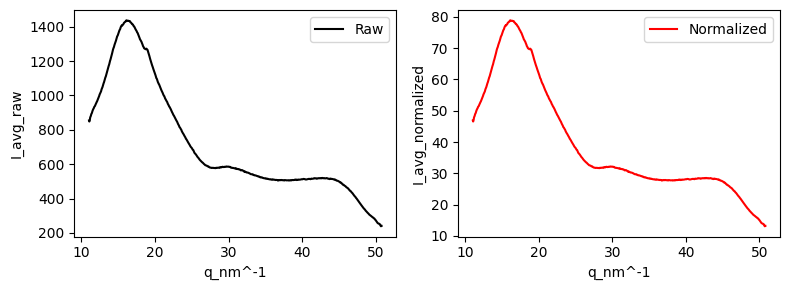

Run4_PLA_MeOH_T190_dx1_ctr17_3average_all_WAXS.dat


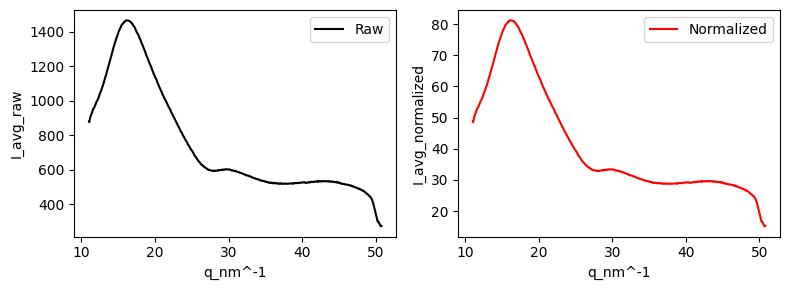

Run4_PLA_T190_dx1_ctr17_3average_all_WAXS.dat


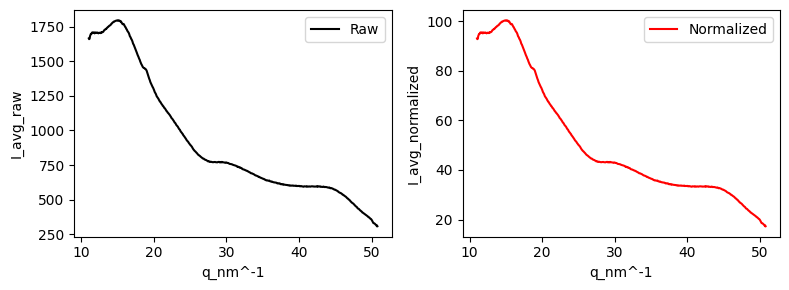

Run4_MeOH_T200_dx1_ctr18_3average_all_WAXS.dat


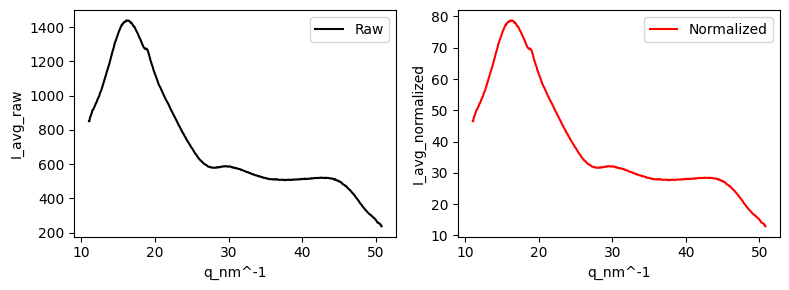

Run4_PLA_MeOH_T200_dx1_ctr18_3average_all_WAXS.dat


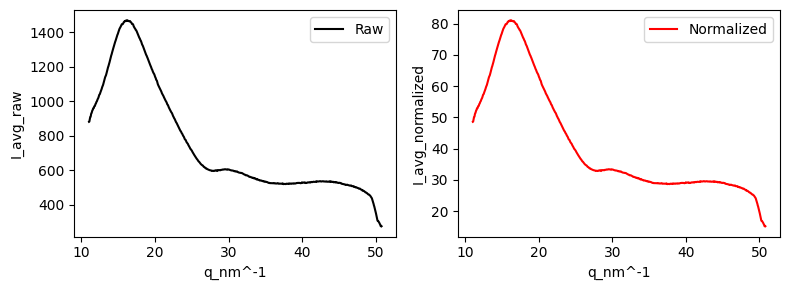

Run4_PLA_T200_dx1_ctr18_3average_all_WAXS.dat


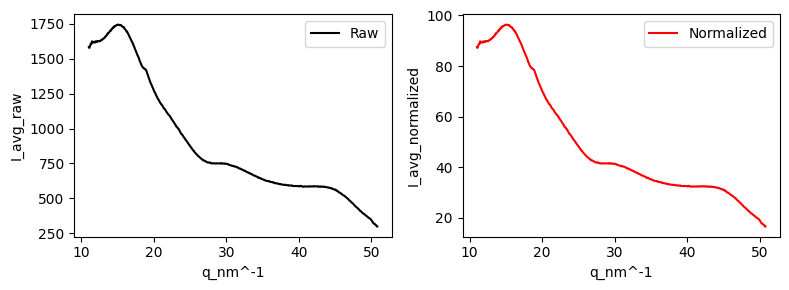

In [3]:

folder_path_waxs_base = '/Users/akmaurya/Library/CloudStorage/OneDrive-SLACNationalAcceleratorLaboratory/My Onedrive/Data_01/Methanolysis/Dec2023/OneD_integrated_WAXS_01/Reduction'
save_WAXS_norm_files = os.path.join(folder_path_waxs_base.replace("Reduction", ""), "Correction/Normlised")
#save_WAXS_norm_files = '/Users/akmaurya/Library/CloudStorage/OneDrive-SLACNationalAcceleratorLaboratory/My Onedrive/Data_01/Methanolysis/Dec2023/OneD_integrated_WAXS_01/Correction/Normlised'
#print (save_WAXS_norm_files)


Run_number_search = "Run4"

Run_number=Run_number_search  
#Run_number = "Run4"
folder_path = os.path.join(folder_path_waxs_base, Run_number)

matching_files = search_dat_files_with_keywords(folder_path, "", Run_number_search)
#matching_files = ["sone_example.txt", "another_file.txt", "sone_another_file.txt", "file_without_prefix.txt"]
#print(modified_files)

#for filename_search in matching_files:
    #print(filename_search)


for filename_search in matching_files:
    #print(filename_search)
    if "dx_minus_1_WAXS" in filename_search:
        inst_filename = re.sub(r'(ctr\d+).*$', r'\1', filename_search)

        # Remove "sone_" from the beginning of inst_filename
        inst_filename = re.sub(r'^sone_', '', inst_filename)

        #print(filename_search)
        #print(inst_filename)
        inst_parameters = extract_data_from_folder(folder_path, inst_filename)
        q, I_raw_minus1, I_sigma_minus1, I_norm_minus1, I_norm_sigma_minus1  = process_sample_data(filename_search, folder_path, inst_parameters)

    elif "_dx0_WAXS" in filename_search or "_dx1_WAXS" in filename_search:
        inst_filename = re.sub(r'(ctr\d+).*$', r'\1', filename_search)
        inst_filename = re.sub(r'^sone_', '', inst_filename)
        #print(filename_search)
        #print(inst_filename)
        inst_parameters = extract_data_from_folder(folder_path, inst_filename)
        q, I_raw_dx, I_sigma_dx, I_norm_dx, I_norm_sigma_dx = process_sample_data(filename_search, folder_path, inst_parameters)

    elif "_all_WAXS" in filename_search:
        print(filename_search)
        inst_filename = re.sub(r'(ctr\d+).*$', r'\1_scan1_all_average', filename_search)
        inst_parameters = extract_data_from_folder(folder_path, inst_filename)
        #print(inst_parameters)
        #print(inst_filename)
        #print(filename_search)
        q, I_raw, I_sigma, I_norm, I_norm_sigma = process_sample_data(filename_search, folder_path, inst_parameters)

        #import matplotlib.pyplot as plt
        # Create subplots with 'num_subplots' rows
        fig, axs = plt.subplots(1, 2, figsize=(8,3))

        # Plot data for the first subplot
        
        axs[0].plot(q, I_raw, 'k-',label="Raw")
        axs[0].set_xlabel("q_nm^-1")
        axs[0].set_ylabel("I_avg_raw")
        axs[0].legend()
        #axs[0].set_title(f"raw Data Plot - {filename_search}")

        # Plot data for the second subplot
        # Assuming you have different data for the second subplot, replace 'q_2', 'I_norm_2', 'I_raw_2', etc., with your actual data
        axs[1].plot(q, I_norm, 'r-',label="Normalized")
        
        axs[1].set_xlabel("q_nm^-1")
        axs[1].set_ylabel("I_avg_normalized")
        axs[1].legend()
        #axs[1].set_title(f"Normalized Data Plot - {filename_search}")

        plt.tight_layout()
        plt.show()




        # Create a DataFrame for subtracted data
        data = {"q_nm^-1": q, "I_avg_nomrlised": I_norm, "I_norm_sigma": I_norm_sigma}
        df = pd.DataFrame(data)

        dat_filename = f"{save_WAXS_norm_files}/{inst_filename}_Norm.dat"

        #print(dat_filename)
        headers = [
            f"filename_{filename_search}",
            f"instrument_filename_{inst_filename}",
            'Time_duration_hr  ----- CTEMP -----  I0 ----- bstop',
            f"{inst_parameters}", "q_nm^-1 ------ I_avg_nomrlised ----- I_norm_sigma",
        ]
        commented_headers = ['# ' + header for header in headers]

        with open(dat_filename, 'w') as dat_file:
            dat_file.write('\n'.join(commented_headers) + '\n')
            df.to_csv(dat_file, sep='\t', index=False, header=False)

    else:
        print("No match found for sample files")

    #I_dx_minus_1_norm, I_dx0_norm, I_dx1_norm, I_avg_norm = [], [], [], []
